### Q1

The *Gibbs sampler* in class for the prior $p(\theta,\tau) \propto 1$ was created by alternatingly sampling from the *full conditional* $p(\theta|\tau,\textbf{x})$ *normal* and  $p(\tau|\theta,\textbf{x})$ *gamma* distributions. Create this *Gibbs sampler* so your code can be used for the sample `x = stats.norm(loc=m, scale=s).rvs(size=n)` for any arbitrary `n`, `m`, and `s`.

*Use the code below or your own code to <u>provide a demonstration of Bayesian inference<u> for this data and model specification.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# loc is mean and scale is standard deviation
n = 30
m = 1
s = 2
np.random.seed(365)
x = stats.norm(loc=m, scale=s).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = stats.gamma(a=n/2 +1 ,scale=2/((x-theta[c,g-1])**2).sum()).rvs()
        theta[c,g] = stats.norm(x.mean(), scale = 1/(tau[c,g]*n)**0.5).rvs()

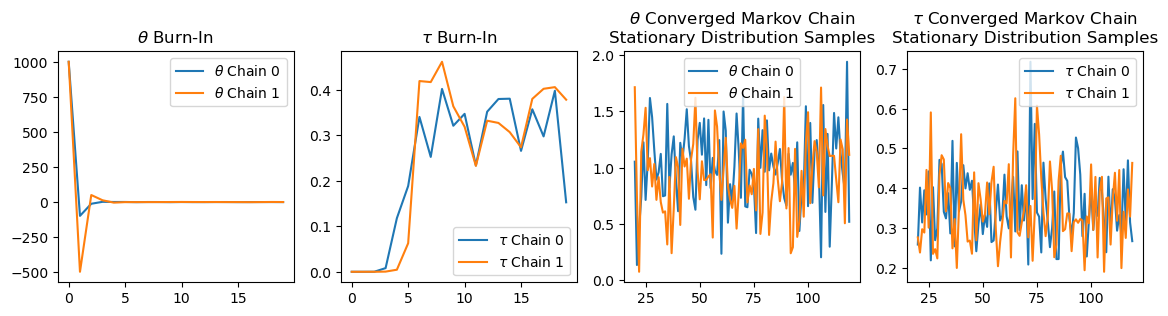

In [3]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();     

array([0.37586945, 1.62788597])

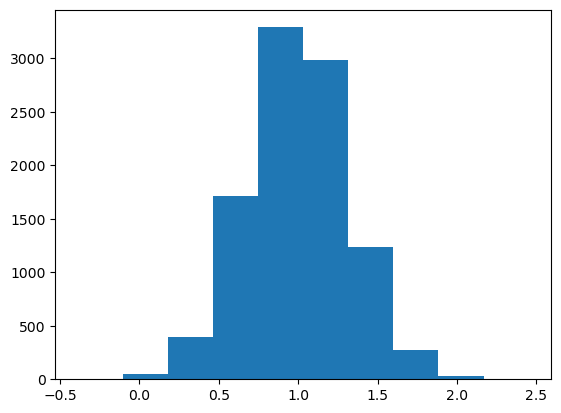

In [4]:
#Bayesian inference of theta given x has the credible interval of (0.3759, 1.7279)
plt.hist(theta[0,burn:])
np.quantile(theta[0,burn:],[0.025,0.975])

array([1.34323714, 2.2282776 ])

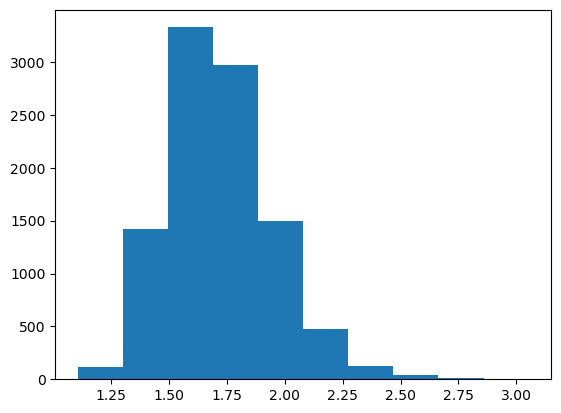

In [8]:
#Bayesian inference of tau given x has the credible interval of (1.3432, 2.228)
plt.hist(1/tau[0,burn:]**0.5)
np.quantile((1/tau[0,burn:]**0.5),[0.025,0.975])

### Q2

Derive the *full conditional distributions* $p(\tau|\theta, \mathbf{x})$ and $p(\theta|\tau, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau^2_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$. 

*Explain how to equate $\alpha$ and $\lambda$ with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?*

Create an updated version of the *Gibbs sampler* for $N(\theta_0, \tau^2_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively. 

*Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.*

### Derivations of full conditional distributions: 
With given prior distributions are:


1. For $$ \theta :
   p(\theta) \sim N(\theta_0, \tau_0^2)$$

   where $\theta_0 $ is the prior mean and $\tau_0^2$ is the prior variance.

2. For $$ \tau:
   p(\tau) \propto \tau^{\frac{\alpha}{2} - 1} e^{-\frac{\lambda}{2} \tau}$$
   This is the kernel of a Gamma distribution with shape $ \frac{\alpha}{2}$ and rate $ \frac{\lambda}{2} $.

And we also know that the likelihood is: 

$$
\begin{align*}
p\left(x|\theta,\tau\right) = {} & \prod_{i=1}^n \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i-\theta)^2}\\ & \propto \tau^{n/2} \exp\left(-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2\right)
\end{align*}$$

Thus, we would be able to get full conditional distributions with prior and likelihood. 
$$p(\tau | \theta, x) = p(x | \theta, \tau)p(\tau) \propto \tau^{\frac{\alpha}{2} - 1} e^{-\frac{\lambda}{2} \tau} \cdot \tau^{n/2} \exp\left(-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2\right)$$
To combine the terms:
$$p(\tau | \theta, x) \propto \tau^{\frac{\alpha + n}{2} - 1} \exp\left(-\frac{\tau}{2} \left(\lambda + \sum_{i=1}^n (x_i - \theta)^2\right)\right)$$
This corresponds to a Gamma distribution:
$$\tau | \theta, x \sim \text{Gamma}\left(\frac{\alpha + n}{2}, \frac{\lambda + \sum_{i=1}^n (x_i - \theta)^2}{2}\right)$$

Similarly, the full conditional distribution could be found: 
$$p(\theta | \tau, x) = p(x | \theta, \tau)p(\theta) \propto \exp\left(-\frac{1}{2\tau_0^2}(\theta - \theta_0)^2\right) \cdot \exp\left(-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2\right)$$


In the above step, we ignored $\tau$ term as we only care about $\theta$ for the kernel.

Combing the terms: 
$$p(\theta | \tau, x) \propto \exp\left(-\frac{1}{2} \left[\left(\frac{1}{\tau_0^2} + \tau n\right)\theta^2 - 2\left(\frac{\theta_0}{\tau_0^2} + \tau \sum_{i=1}^n x_i\right)\theta\right]\right)$$

This is the kernel of a normal distribution:
$$\theta | \tau, x \sim N\left(\mu_\theta, \sigma_\theta^2\right)$$
where:
$$
\mu_\theta = \frac{\frac{\theta_0}{\tau_0^2} + \tau \sum_{i=1}^n x_i}{\frac{1}{\tau_0^2} + \tau n}, \quad \sigma_\theta^2 = \frac{1}{\frac{1}{\tau_0^2} + \tau n}$$.

Explanation of $\alpha and \lambda$: 

$\alpha$ has the contribution to the prior $p(\tau)$, which consquently has the contribution to the posterior, and 
$\lambda$ determines their scale. Larger $\lambda$ implies stronger prior belief about $\tau$ (because it has the contribution on the prior $p(\tau)$, while $\lambda$ affects the precision of this belief. If $\alpha$ and $\lambda$ are all very small, then the posterior will largely depend on the likelihood (which largely depends on the data points), while if $\alpha$ and $\lambda$ are large, then prior will play an important role. 

### Updated code: 

In [16]:
n = 30
m = 0
s = 1
np.random.seed(365)
x = stats.norm(loc=m, scale=s).rvs(size=n)

C, G = 2, 10000  # Number of chains and Gibbs samples
theta, tau = np.zeros((C, G)), np.zeros((C, G))
theta[:, 0] = 1000  # Initialization of theta
alpha = 2
lambda_ = 2

# Gibbs sampling
for c in range(C):
    for g in range(1, G):
        # Update tau | theta, x
        shape = (alpha + n) / 2
        rate = (lambda_ + np.sum((x - theta[c, g - 1]) ** 2)) / 2
        tau[c, g] = stats.gamma(a=shape, scale=1 / rate).rvs()
        
        # Avoid division by zero by ensuring tau > 0
        if tau[c, g] <= 0:
            tau[c, g] = 1e-6 
        
        # Update theta | tau, x
        tau_n = 1 / (1 / s**2 + tau[c, g] * n)
        mu_n = tau_n * (m / s**2 + tau[c, g] * np.sum(x))
        theta[c, g] = stats.norm(loc=mu_n, scale=np.sqrt(tau_n)).rvs()


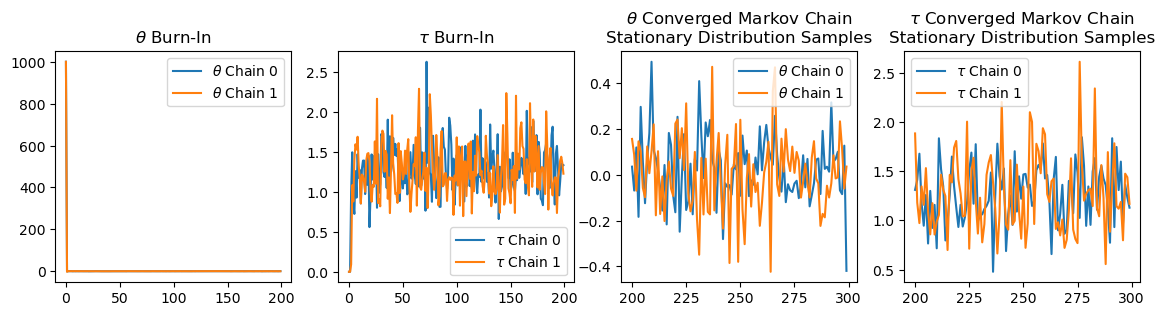

In [17]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 200
demo = 300
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();  

array([-0.3204699,  0.3245217])

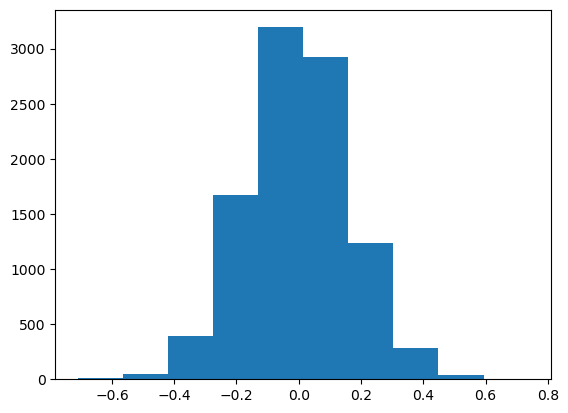

In [18]:
#Bayesian inference of theta given x has the credible interval of (-0.3204, 0.3245)
plt.hist(theta[0,burn:])
np.quantile(theta[0,burn:],[0.025,0.975])

array([0.70034151, 1.16385834])

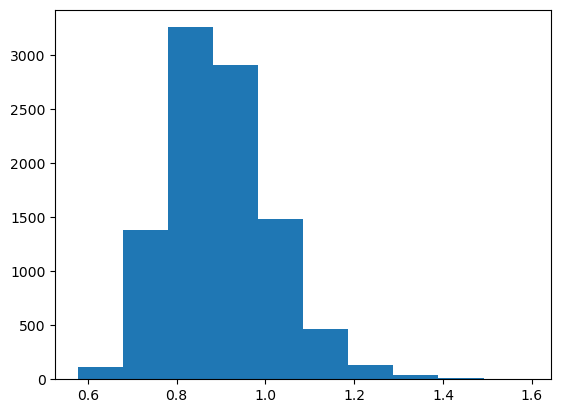

In [19]:
#Bayesian inference of tau given x has the credible interval of (0.7003, 1.1638 )
plt.hist(1/tau[0,burn:]**0.5)
np.quantile((1/tau[0,burn:]**0.5),[0.025,0.975])

### Q3

*Read the following "conversation". My reactions to this initial text I was provied with are the colored font. Then either (A) provide an analagous derivation of this result for the multinomial-Dirichlet specification, or (B) just report that if the prior is a proper distribution then posterior is proportional to the joint distribution as Bayes Theorem tells us and describe how one might therefore identify the exact distribution of the posterior by just looking at the joint but that finally all this is moot and besides the point because as Bayesians we're going to trade any functional forms of distributions for samples from those distributions to just make histograms and belief (credible interval probability) statements based on those anyway...*

Suppose we have the following model setup:
\begin{align*}
    x_1,...,x_n &\overset{iid}{\sim} \text{Bernoulli}(\theta)\\
    \theta &\sim \text{Beta}(a, b)
\end{align*}

The joint likelihood distribution of ~~x_1,...,x_n~~ <span style='color:red'> $\sum_i x_i$</span> $| \theta$ is $\text{Binomial}(n, \theta)$. Now, let's consider the posterior:
\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{p(x_1,...,x_n)} = \color{red}{\frac{p(\mathbf{x} | \theta)p(\theta)}{p(\mathbf{x})}}\\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} = \color{red}{\frac{p(\mathbf{x}| \theta)p(\theta)}{\int p(\mathbf{x} | \theta )p(\theta) d\theta}}
\end{align*}

We can directly calculate the above if the denominator is finite. We tend to use proportionality arguments in this class, but to build some intuition <span style='color:red'>Bayes theorem is $p(\theta | \mathbf{x}) = \frac{p(\mathbf{x} | \theta )p(\theta)}{p(x)}$ and (if we know $\mathbf{x}$) then $p(\mathbf{x})$ is a constant so we must gather all $\theta$ related terms in our mathematical expression (dropping anything else which is any other constant) and see if we know of any statistical distribution that when scaled by a constant could exactly replicate our math as a function of $\theta$</span>, <span style='color:blue'>but if by "intuition" you mean the next 10 lines of derivation because you refuse to believe that the posterior is proportional to the joint (for proper priors) as Bayes Theorem claims</span> let's formally calculate that integral for the Beta-Binomial problem:

$\scriptsize
\begin{align*}
    \int p(\overset{\color{red}{\textrm{You meant } \sum_i x_i}}{x_1,...,x_n} | \theta )p(\theta) d\theta &= \int_0^1 \color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\int_0^1 \theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\int_0^1 \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\\& \text{ (because we have written the density formula above, which integrates to } 1)\\    
  & \color{blue}{\textrm{(But why stop there shouldn't we prove the integral is equal to 1 for "intuition"?)}}\\
    & \color{red}{\textrm{(if "intuition" may assume a density has area 1 then prove or believe Bayes Theorem)}}\\
    & \color{purple}{\textrm{Proof: $p(\theta|\mathbf{x})p(\mathbf{x}) = p(\mathbf{x}|\theta)p(\theta) \Rightarrow p(\theta|\mathbf{x}) = \frac{p(\mathbf{x}|\theta)p(\theta)}{p(\mathbf{x})}$}} \\    
    & \color{green}{\textrm{(Bayes Theorem is the formula for a posterior distribution if the prior is proper)}}\\
    & \color{blue}{\textrm{(If you believe it then the posterior is proportional to the joint and must have area 1)}}\\
    & \color{red}{\textrm{(Can you recognize what distribution for $\theta$ would be proportional to the given joint?)}}\\
    & \color{green}{\textrm{(There's only gonna be one... can't be two... can you find one distribution that does it?)}}\\
\end{align*}$

Now, we can directly plug in to our Bayes formula to directly calculate the posterior:

$\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} \\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i} \theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a-1}(1-\theta)^{n-\sum_i x_i+b-1} \\
    &= \text{Beta}(a+ \sum_i x_i, b + n - \sum_i x_i)
\end{align*}$

<span style='color:blue'>
So the structure of this "proof" providing the right kind of "intution" you'll apparently need to feel comfortable and safe about proportionality if believing that the posterior is proportional to the joint as Bayes Theorem claims is a step too far is...</span>

$\color{green}{\require{cancel}
\begin{align}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}} &={} \frac{\cancel{c_xc_\theta} c p(\boldsymbol{\theta}|\textbf{x})}{\cancel{c_xc_\theta} \int c p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}\\
&={} \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \int \xcancel{\frac{1}{c} c} p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}} =  \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \cancel{\int p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}^1} = \frac{\xcancel{c} p(\boldsymbol{\theta}|\textbf{x})}{ \xcancel{c} } = p(\boldsymbol{\theta}|\textbf{x})\\
\end{align}}
$

<span style='color:blue'>
Or here's an even more direct way to show this...
</span>

$\color{red}{
\begin{align*}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}}
 &={} \frac{p(\boldsymbol{\theta}|\textbf{x})p(\textbf{x})}{p(\textbf{x})} \\
  &={} p(\boldsymbol{\theta}|\textbf{x})
\end{align*}}
$    



We can see that when we have ~~**conjugate** priors (where the prior and posterior have the same form)~~ <u>**just any (propor) prior**</u>, the denominator in Bayes rule amounts to any normalizing constants in the likelihood and prior (that allow for the densities to integrate to 1 times the inverse of the equivalent normalizing constant of the posterior. Once we plug this back in to Bayes formula and cancel and rearrange terms, this amounts to multiplying the normalizing constant of the posterior with the portion of the posterior that relies on the parameter. This sort of derivation isn't unique to conjugate priors; as long as we can recognize the family in which the product of the prior and likelihood belong to, the integral in the denominator can be solved by simplifying the term in the integral to the precise density (which occurs by moving normalizing constants outside of the integral, and introducing the normalizing constant for that new density). This is the technique we used to solve the integral above.

As a result, we can use a proportionality argument to skip all of these mathematical derivations. If we can recognize the functional form of the product between the likelihood and prior as being in the family of another probability distribution, then that is equivalent to moving around these normalizing constants to simplify integrals.



### solution (A) provide an analagous derivation of this result for the multinomial-Dirichlet specification: 

The likelihood is the probability mass function of a multinomial distribution:
$$
p(x \mid \theta, n) = \frac{n!}{x_1! \cdots x_k!} \prod_{i=1}^k \theta_i^{x_i}.
$$

The prior is the probability density function of a Dirichlet distribution:
$$
p(\theta \mid \alpha) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1},
$$
where:
$$
B(\alpha) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}.
$$

and:
$$
\alpha_0 = \sum_{i=1}^k \alpha_i.
$$


The posterior could be calculated by: 
\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{p(x_1,...,x_n)} = \color{red}{\frac{p(\mathbf{x} | \theta)p(\theta)}{p(\mathbf{x})}}\\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} = \color{red}{\frac{p(\mathbf{x}| \theta)p(\theta)}{\int p(\mathbf{x} | \theta )p(\theta) d\theta}}
\end{align*}

In order to verify our intution on the belief of using the proportionality, we would consider to look at the normalization term of the posterior function. 
Firstly, we would get the expression of joint probability (numerator of the posterior): 

The joint distribution is:
$$
p(x, \boldsymbol{\theta}) = p(x | \boldsymbol{\theta}) p(\boldsymbol{\theta}).
$$

$$
p(x, \boldsymbol{\theta}) = \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{j=1}^k \theta_j^{x_j} 
\cdot 
\frac{\Gamma\left(\sum_{j=1}^k \alpha_j\right)}{\prod_{j=1}^k \Gamma(\alpha_j)} \prod_{j=1}^k \theta_j^{\alpha_j - 1}.
$$

Simplify:
$$
p(x, \boldsymbol{\theta}) = \frac{n!}{x_1! x_2! \cdots x_k!} 
\cdot 
\frac{\Gamma\left(\sum_{j=1}^k \alpha_j\right)}{\prod_{j=1}^k \Gamma(\alpha_j)} 
\prod_{j=1}^k \theta_j^{x_j + \alpha_j - 1}.
$$


To get the normalization term, we would take the integral with respect to $\theta$: 

$$
\int p(x, \boldsymbol{\theta}) \, d\boldsymbol{\theta} 
= \int \frac{n!}{x_1! x_2! \cdots x_k!} 
\cdot 
\frac{\Gamma\left(\sum_{j=1}^k \alpha_j\right)}{\prod_{j=1}^k \Gamma(\alpha_j)} 
\prod_{j=1}^k \theta_j^{x_j + \alpha_j - 1} \, d\boldsymbol{\theta}.
$$

Since the first and the second term on the right hand of the equation are independent of $\theta$, thus we have: 
$$
\int p(x, \boldsymbol{\theta}) \, d\boldsymbol{\theta} 
= \frac{n!}{x_1! x_2! \cdots x_k!} 
\cdot 
\frac{\Gamma\left(\sum_{j=1}^k \alpha_j\right)}{\prod_{j=1}^k \Gamma(\alpha_j)} 
\int \prod_{j=1}^k \theta_j^{x_j + \alpha_j - 1} \, d\boldsymbol{\theta}.
$$



Let's deal with the integration term, we realize that the integration term is just the integral of Dirchlet distribution's kernal, that is,the integration term could be considered as the normalizing constant (which is multivariate beta function):
$$
\int \prod_{j=1}^k \theta_j^{x_j + \alpha_j - 1} \, d\boldsymbol{\theta} 
= \frac{\prod_{j=1}^k \Gamma(x_j + \alpha_j)}{\Gamma\left(\sum_{j=1}^k (x_j + \alpha_j)\right)}.
$$

Thus, the final normalization constant becomes:
$$
\int p(x, \boldsymbol{\theta}) \, d\boldsymbol{\theta} 
= \frac{n!}{x_1! x_2! \cdots x_k!} 
\cdot 
\frac{\Gamma\left(\sum_{j=1}^k \alpha_j\right)}{\prod_{j=1}^k \Gamma(\alpha_j)} 
\cdot 
\frac{\prod_{j=1}^k \Gamma(x_j + \alpha_j)}{\Gamma\left(\sum_{j=1}^k (x_j + \alpha_j)\right)}.
$$


Finally, we move onto the posterior distribution and substitute the joint distribution: 
$$
p(\boldsymbol{\theta} | x) = \frac{p(x,\theta)}{\int p(x, \boldsymbol{\theta}) \, d\boldsymbol{\theta}}  = 
\frac{\frac{n!}{x_1! x_2! \cdots x_k!} 
\cdot 
\frac{\Gamma\left(\sum_{j=1}^k \alpha_j\right)}{\prod_{j=1}^k \Gamma(\alpha_j)} 
\prod_{j=1}^k \theta_j^{x_j + \alpha_j - 1}}
{\frac{n!}{x_1! x_2! \cdots x_k!} 
\cdot 
\frac{\Gamma\left(\sum_{j=1}^k \alpha_j\right)}{\prod_{j=1}^k \Gamma(\alpha_j)} 
\cdot 
\frac{\prod_{j=1}^k \Gamma(x_j + \alpha_j)}{\Gamma\left(\sum_{j=1}^k (x_j + \alpha_j)\right)}}.
$$


Simplify the equation: 
$$
p(\boldsymbol{\theta} | x) = 
\frac{\Gamma\left(\sum_{j=1}^k (x_j + \alpha_j)\right)}
{\prod_{j=1}^k \Gamma(x_j + \alpha_j)} 
\prod_{j=1}^k \theta_j^{x_j + \alpha_j - 1}.
$$

This final posterior expression follows Dirichlet distribution as expected: 
$$
p(\boldsymbol{\theta} | x)  \sim \text{Dirichlet}(x_1 + \alpha_1, x_2 + \alpha_2, \dots, x_k + \alpha_k).
$$
